In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy.fft as fft

In [2]:
root_dir = r"D:\A-deng\hunter\demarcate"
file_names = []

In [3]:
def list_dirs(root_dir):
    '''
    深度优先遍历文件夹，将文件夹下所有文件的路径存入file_names
    '''
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            file_names.append(os.path.join(root, file))

In [4]:
list_dirs(root_dir)
# file_names = file_names[0:1]

In [5]:
def read_data(file_names):
    '''
    传入所有数据文件，返回数据，数据形式[x, y, increment, data_size]
    '''
    datalist = []
    for file_name in file_names:
        if file_name.endswith('.csv'):
            print(f"Processing file: {file_name}")
            df = pd.read_csv(file_name)
            y = df['Math'].drop(df.index[0]).astype(float).to_numpy()
            x_start = df["Start"].iloc[0].astype(float)
            x_increment = df["Increment"].iloc[0].astype(float)
            data_size = len(y)
            x_end = x_increment * data_size
            x = np.arange(x_start, x_end, x_increment)
            datalist.append([x, y, x_increment, data_size])
        
    return datalist

In [6]:
data_list = read_data(file_names)

Processing file: D:\A-deng\hunter\demarcate\left_0\left_0_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\left_0\left_0_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\left_180\left_180_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\left_180\left_180_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\left_270\left_270_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\left_270\left_270_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\left_90\left_90_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\left_90\left_90_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_0\right_0_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_0\right_0_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_180\right_180_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_180\right_180_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_270\right_270_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_270\right_270_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_90\right_90_sensor1_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Processing file: D:\A-deng\hunter\demarcate\right_90\right_90_sensor2_ch12.csv


C:\Users\dengyunqian\AppData\Local\Temp\ipykernel_17436\3781447833.py:9: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


In [7]:
print(data_list)

[[array([0.0000000e+00, 4.0000000e-07, 8.0000000e-07, ..., 2.3999988e+00,
       2.3999992e+00, 2.3999996e+00]), array([-0.178, -0.168, -0.178, ..., -0.134, -0.129, -0.134]), 4e-07, 6000000], [array([0.0000000e+00, 4.0000000e-07, 8.0000000e-07, ..., 2.3999988e+00,
       2.3999992e+00, 2.3999996e+00]), array([0.0253, 0.0253, 0.0253, ..., 0.0278, 0.0278, 0.0278]), 4e-07, 6000000], [array([0.0000000e+00, 4.0000000e-07, 8.0000000e-07, ..., 2.3999988e+00,
       2.3999992e+00, 2.3999996e+00]), array([-0.064 , -0.064 , -0.0616, ..., -0.0737, -0.0737, -0.0737]), 4e-07, 6000000], [array([0.0000000e+00, 4.0000000e-07, 8.0000000e-07, ..., 2.3999988e+00,
       2.3999992e+00, 2.3999996e+00]), array([-0.023 , -0.0181, -0.023 , ..., -0.0278, -0.0278, -0.0278]), 4e-07, 6000000], [array([0.0000000e+00, 4.0000000e-07, 8.0000000e-07, ..., 2.3999988e+00,
       2.3999992e+00, 2.3999996e+00]), array([-0.0326, -0.0326, -0.035 , ..., -0.0374, -0.0423, -0.0374]), 4e-07, 6000000], [array([0.0000000e+00, 4.0

In [8]:
# FFT
def do_fft(y, increment, data_size):
    '''
    对y进行FFT变换，返回FFT结果和频率
    '''
    fft_result = fft.fft(y)
    fft_freq = fft.fftfreq(data_size, increment)
    return fft_result, fft_freq

In [9]:
fft_results = []
fft_freqs = []
params_b = []
fft_results_peaks=[]
phases = []

for data in data_list:
    fft_result, fft_freq = do_fft(data[1], data[2], data[3])
    fft_results.append(fft_result)
    fft_freqs.append(fft_freq)

    # 寻找FFT结果中的峰值
    peaks, _ = find_peaks(np.abs(fft_result), height=data[3]*0.01)  # height是选中阈值

    # 获取峰值的频率和振幅
    peak_frequencies = fft_freq[peaks]
    peak_amplitudes = np.abs(fft_result[peaks])
    fft_results_peaks.append(fft_result[peaks])
    print(fft_result[peaks])
    angles = np.angle(fft_result[peaks])

    b = 0
    # 打印峰值信息
    for i, frequency in enumerate(peak_frequencies):
        if frequency > 0:
            print(f"峰值 {i + 1}: 频率 = {frequency} Hz, 振幅 = {peak_amplitudes[i]}, 相位 = {angles[i]}")

            if 2 * np.pi * frequency > b:
                b = 2 * np.pi * frequency
                phase = angles[i]
    
    params_b.append(b)
    phases.append(phase)

[-421557.01909033-141102.98705809j -421557.01909033+141102.98705809j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 444545.1307809351, 相位 = -2.818595852554852
[19513.37490144-150886.84787551j 19513.37490144+150886.84787551j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 152143.395064827, 相位 = -1.4421855967976573
[-260626.03908809+303927.73788464j -260626.03908809-303927.73788464j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 400372.32934660115, 相位 = 2.2796436205838413
[-109833.2377065-33361.11727584j -109833.2377065+33361.11727584j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 114788.08409841158, 相位 = -2.8467051268466017
[-120233.61122563+393242.86315335j -120233.61122563-393242.86315335j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 411212.92621876637, 相位 = 1.8675190500107994
[-97787.90401704-81129.43591558j -97787.90401704+81129.43591558j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 127060.84976902531, 相位 = -2.4490338982704905
[355427.06936578+244704.9475354j 355427.06936578-244704.9475354j]
峰值 1: 频率 = 5.0 Hz, 振幅 = 431519.3077792091, 相位 = 0.6029534962104376
[30009.01491757+126748.06858855j 30009.01491757-126

In [10]:
def ifft_filter(fft_result, fft_freq, desired_frequency, bandwidth):
    '''
    逆FFT滤波，传入参数为数据，采样频率(即1/increment)，数据长度，保留的频率，频率带宽，返回滤波后的数据
    '''

    # 应用滤波器
    fft_result_filtered = np.copy(fft_result)
    fft_result_filtered[(fft_freq > desired_frequency + bandwidth/2) | (fft_freq < desired_frequency - bandwidth/2)] = 0

    # 执行逆FFT
    filtered_signal = fft.ifft(fft_result_filtered)

    # 取实部，因为IFFT的结果可能包含复数
    return filtered_signal.real

In [11]:
def plot_ifft_figure(x, y, filtered_signal):
    '''
    绘制原始和滤波后的信号
    '''
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='source')
    plt.plot(x, filtered_signal, label='filtered red', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

d:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


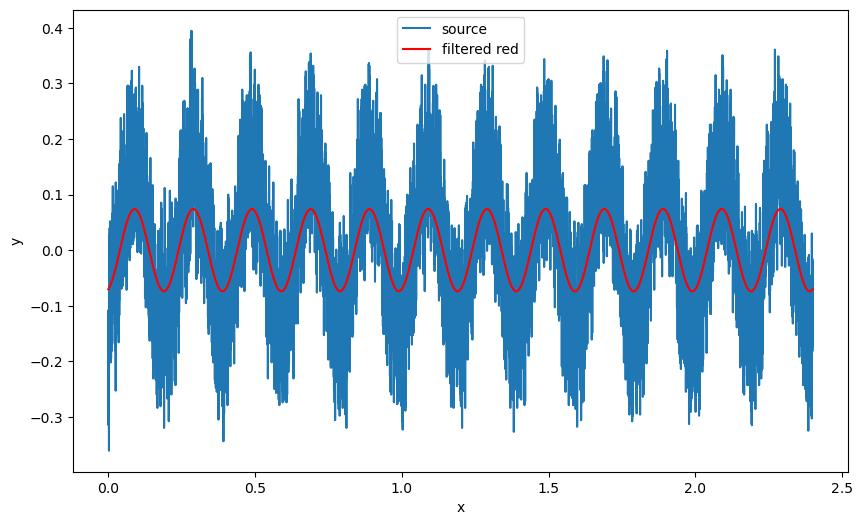

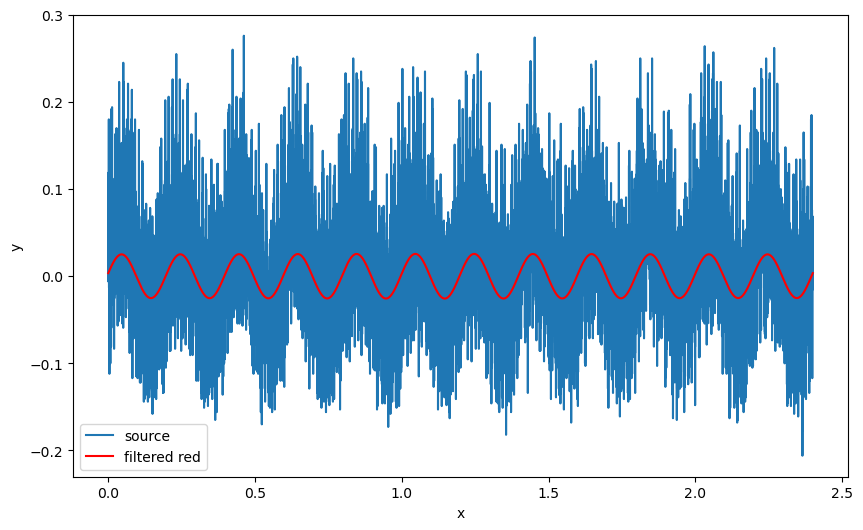

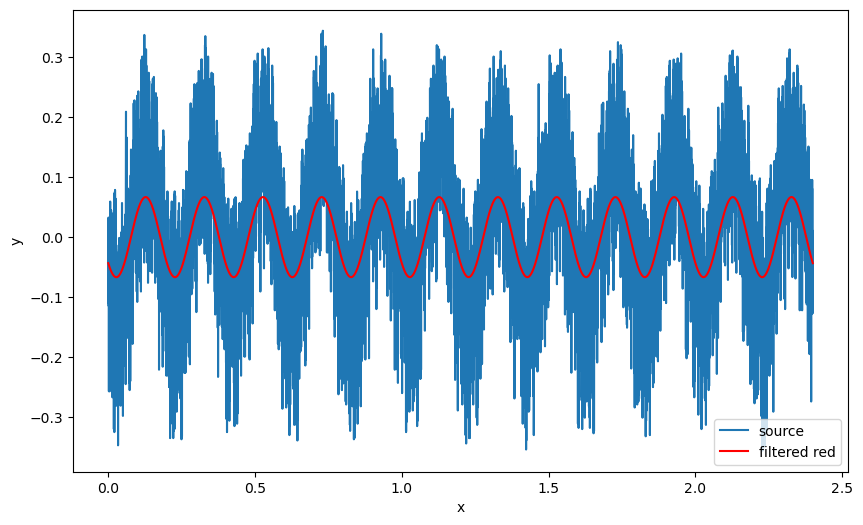

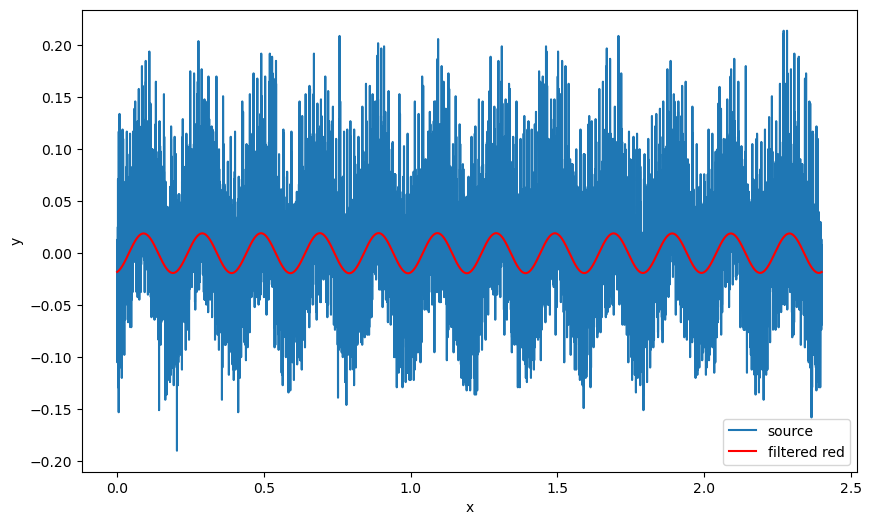

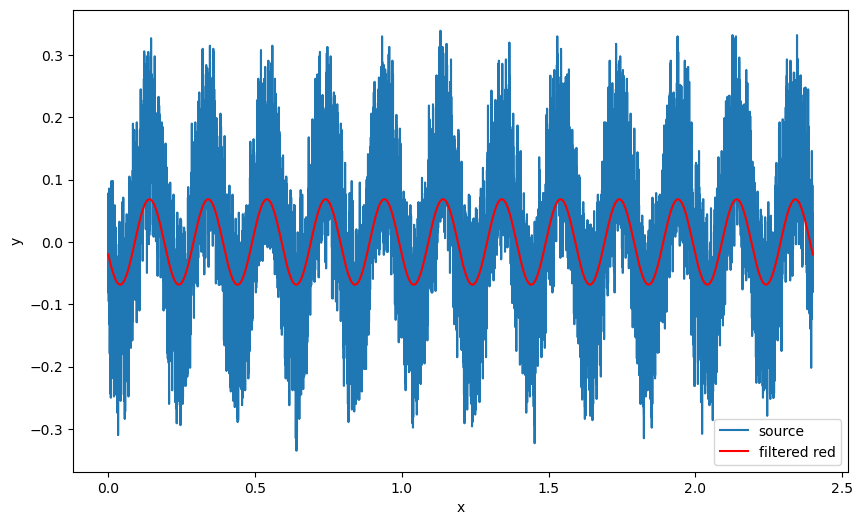

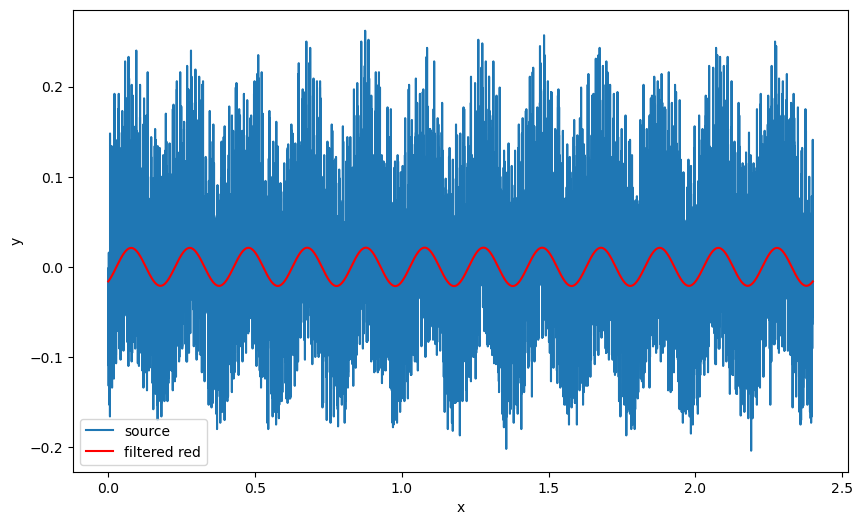

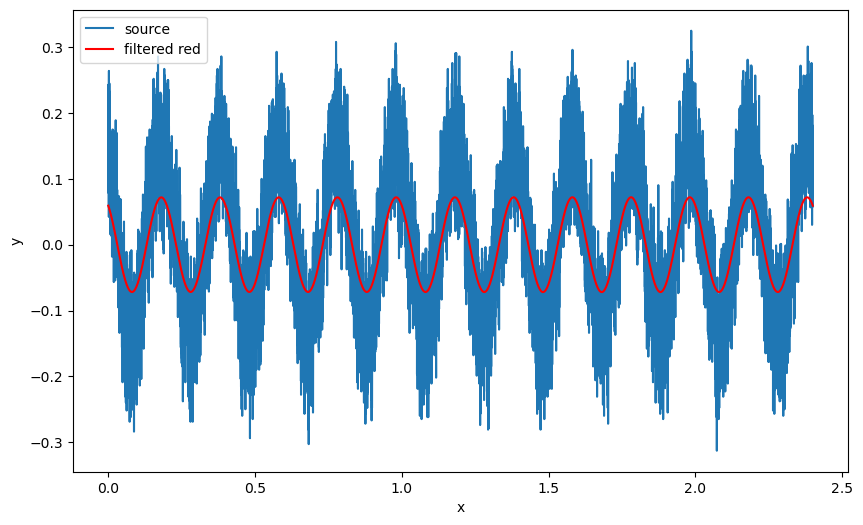

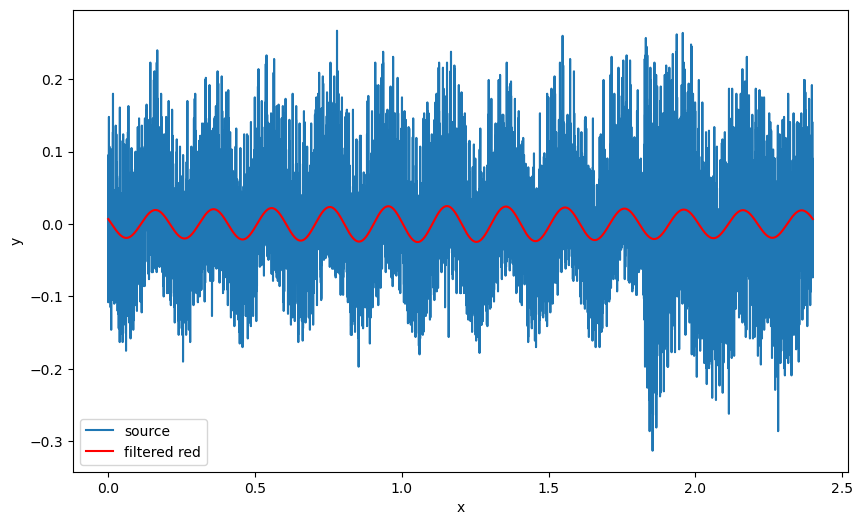

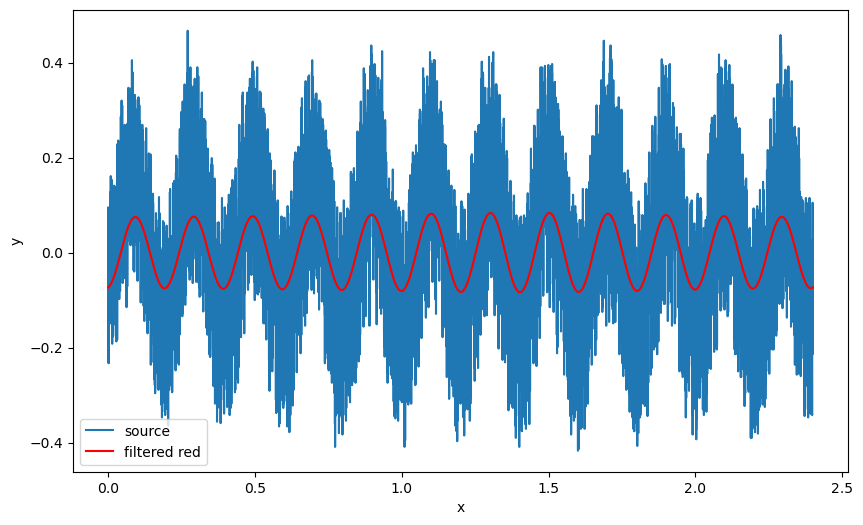

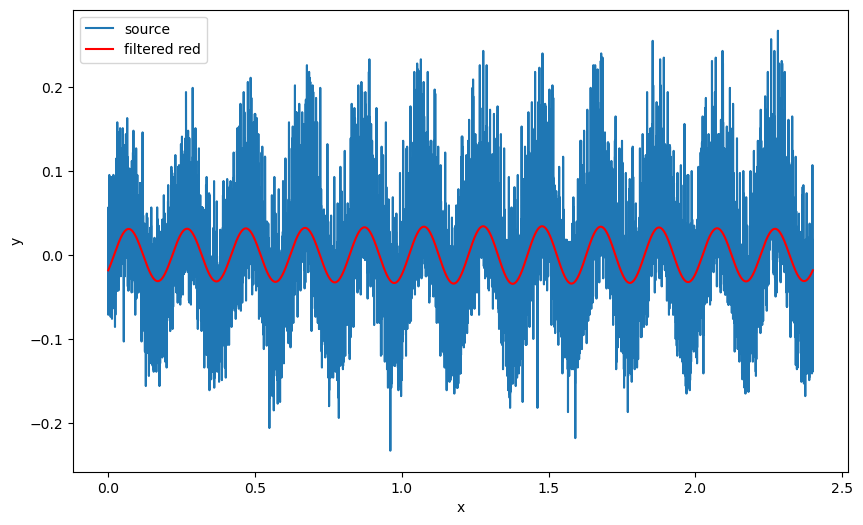

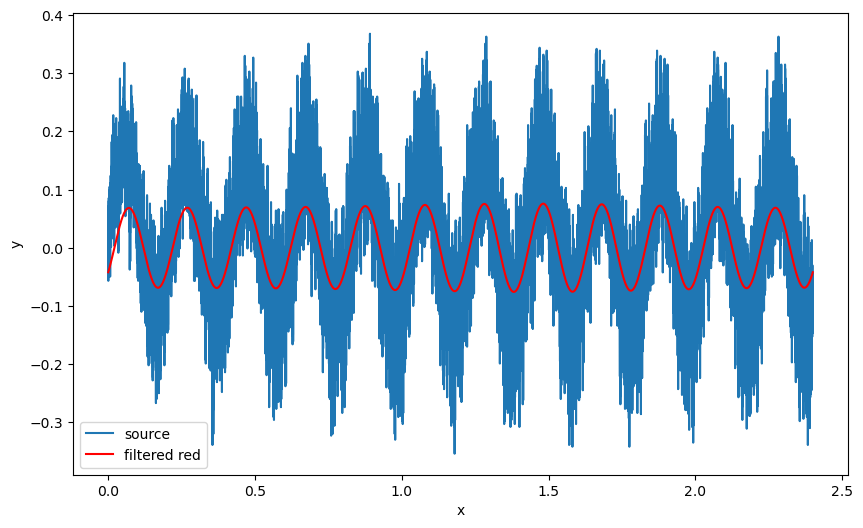

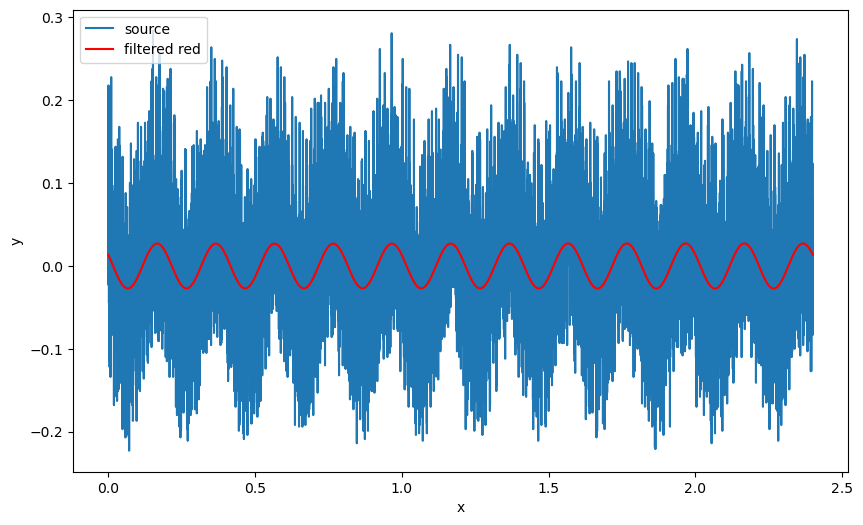

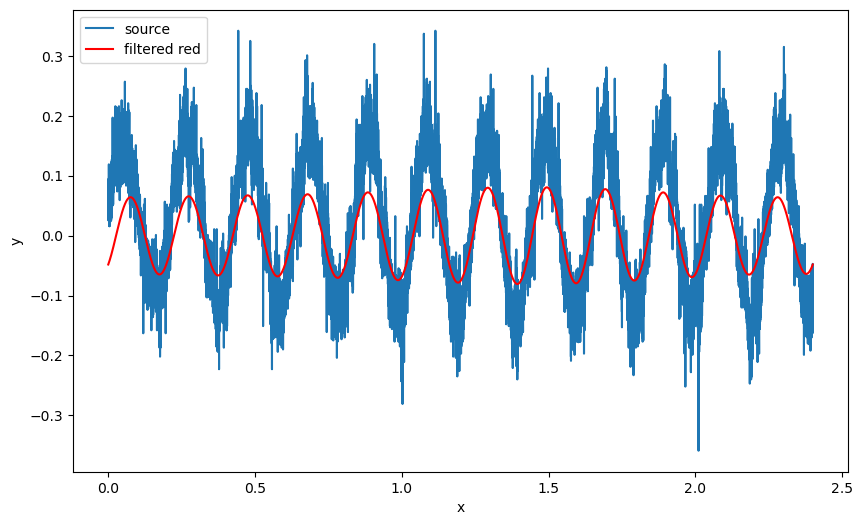

ValueError: x and y must have same first dimension, but have shapes (6500001,) and (6000000,)

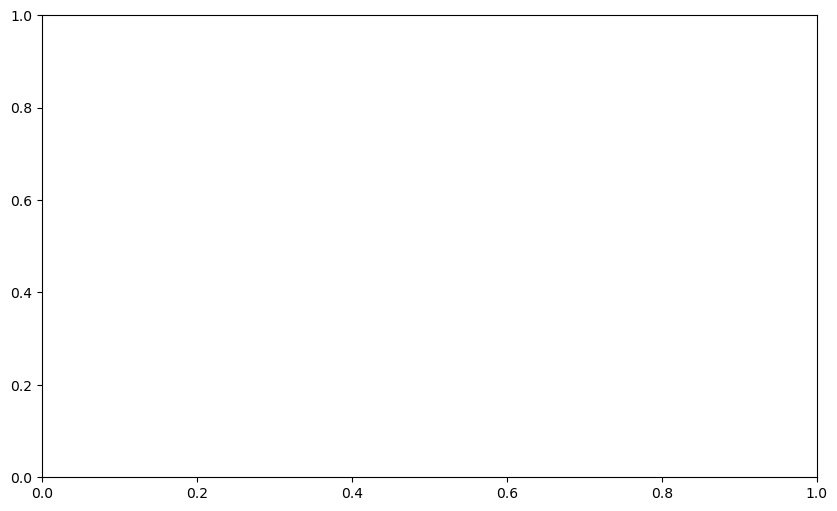

In [12]:
filtered_signals = []

for i in range(len(data_list)):
    filtered_signal = ifft_filter(fft_results[i], fft_freqs[i], params_b[i] / 2 / np.pi, 1)
    filtered_signals.append(filtered_signal)
    plot_ifft_figure(data_list[i][0], data_list[i][1], filtered_signal) 

In [13]:
def plot_curve(x, y, b, popt):
    # 模型函数f(x) = acos(bx+c)
    def func_model(x, a, c):
        return a * np.cos(b * x + c)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='source')
    plt.plot(x, func_model(x, *popt), label='fitting', color='red')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [14]:
# 计算滤波后逆FFT得到的a
ifft_fit_popts = []
for i in range(len(filtered_signals)):
    max_a = 0
    max_a_index = 0
    for j in range(len(filtered_signals[i])):
        temp_y = filtered_signals[i][j]
        if temp_y > max_a:
            max_a = temp_y
            max_a_index = j
    
    max_x = data_list[i][0][max_a_index]
    c = - max_x * params_b[i]     # 取最大值时 bx+c = 0

    ifft_fit_popts.append([max_a, c])

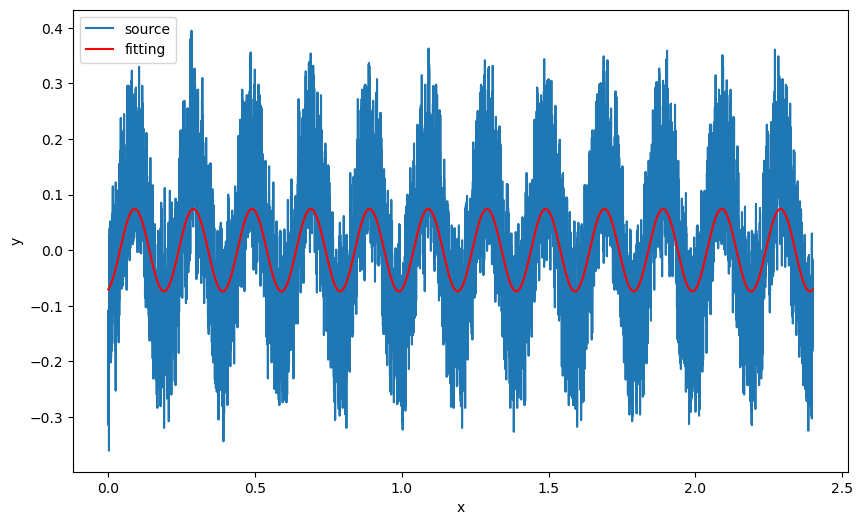

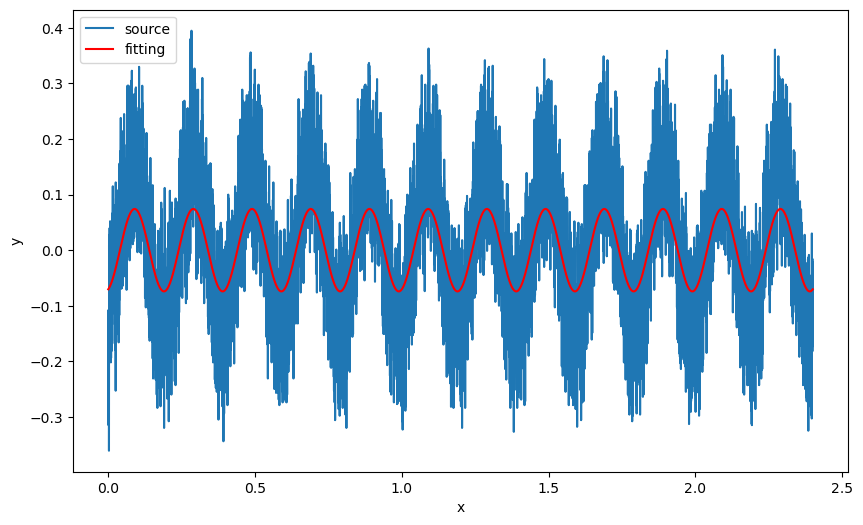

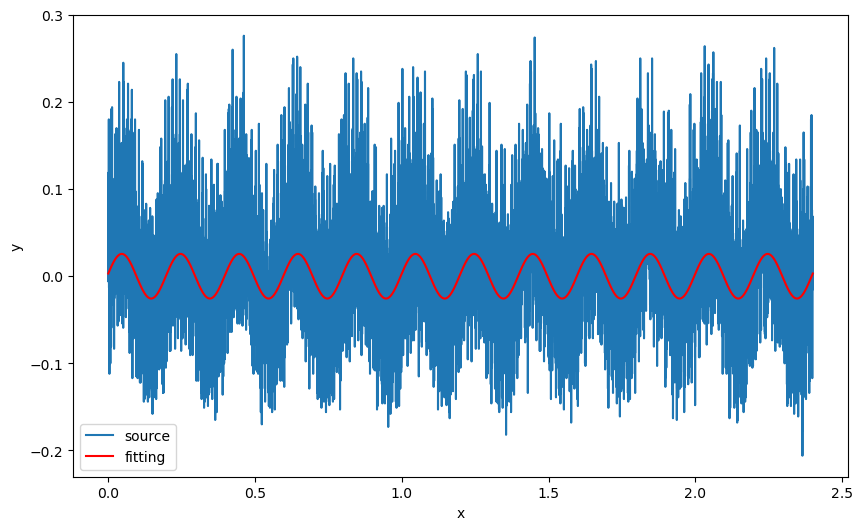

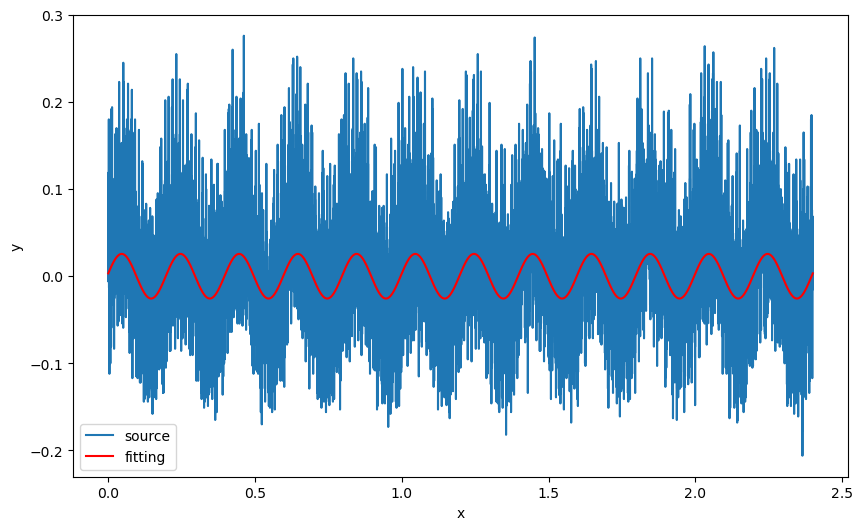

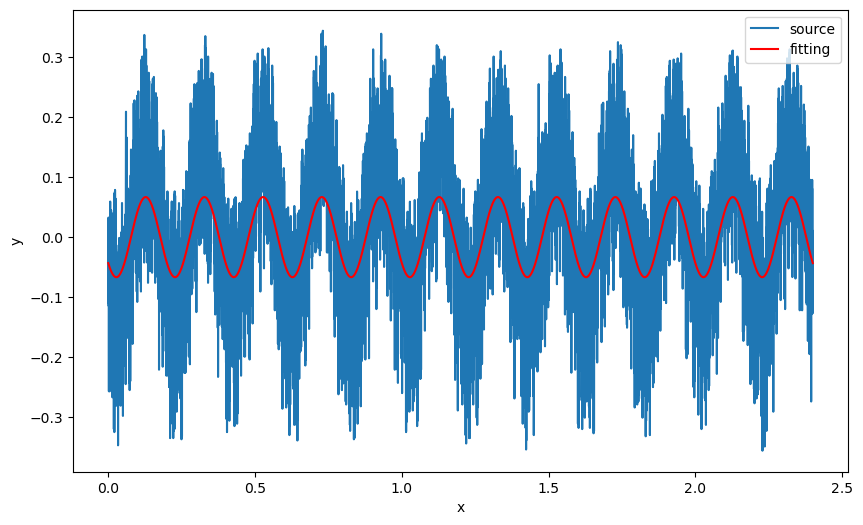

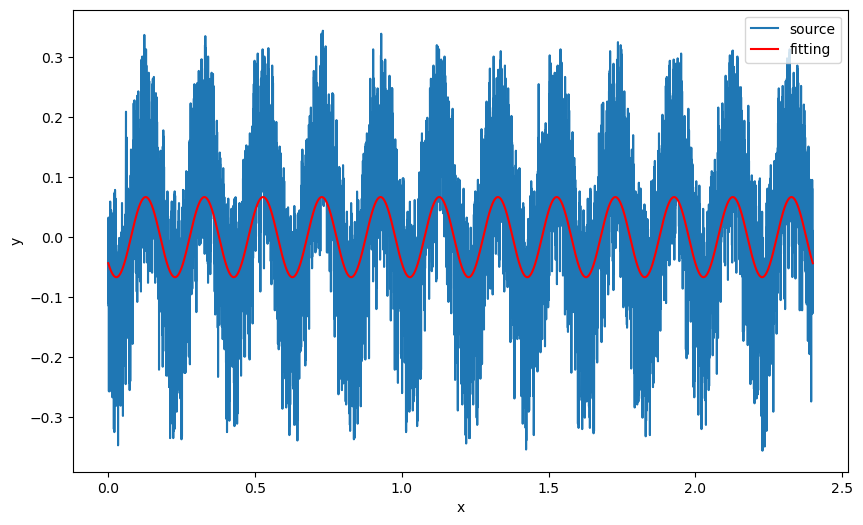

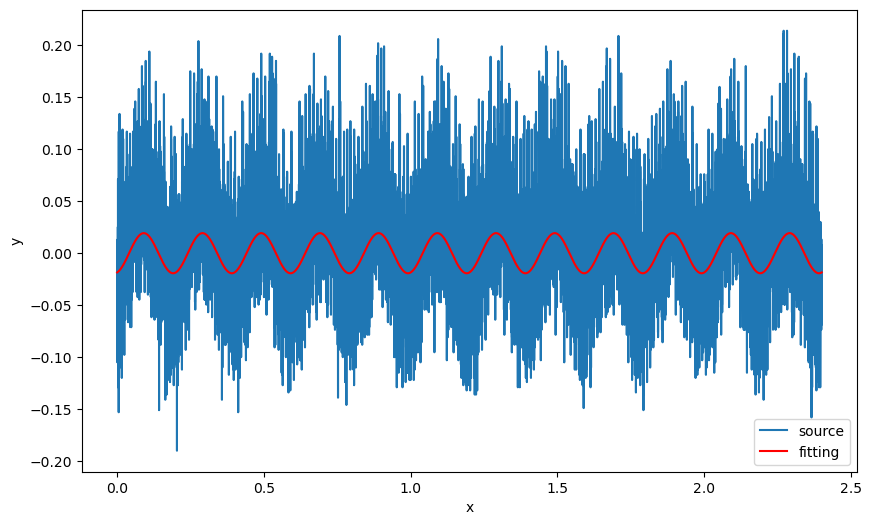

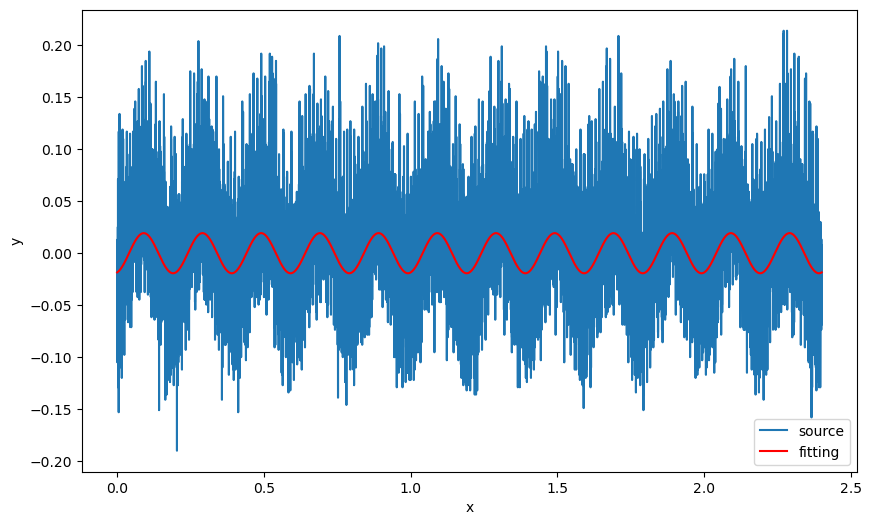

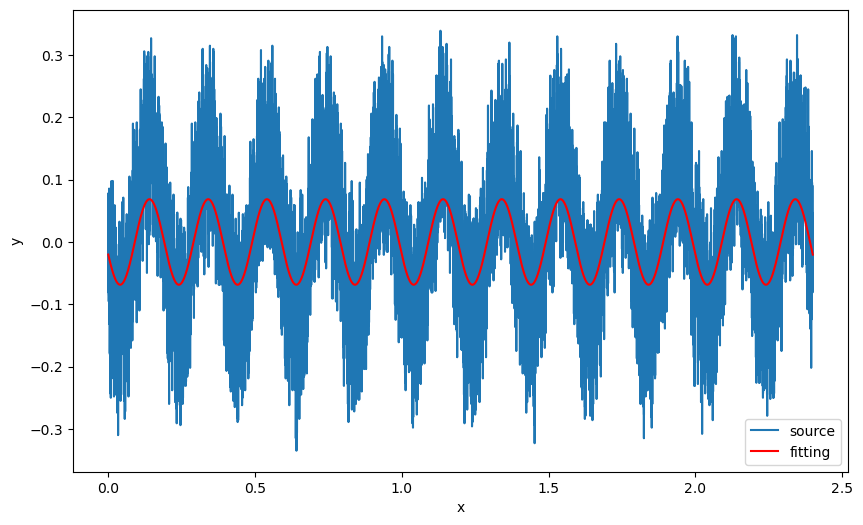

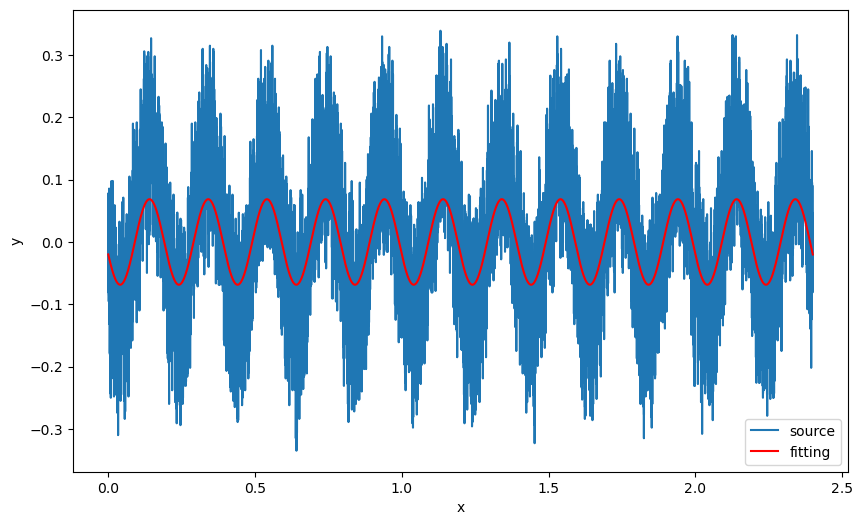

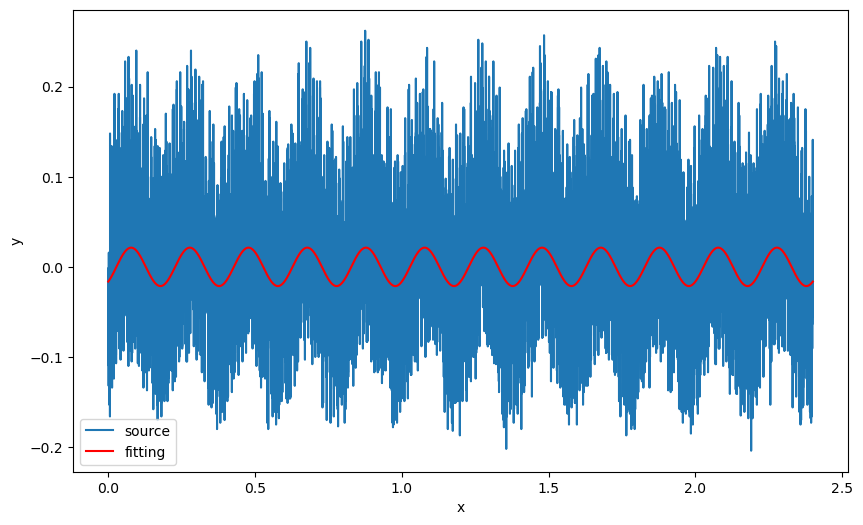

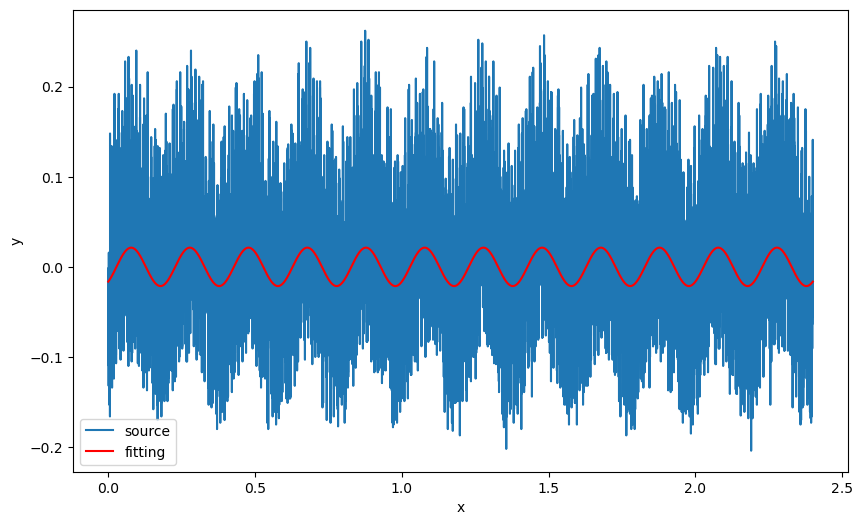

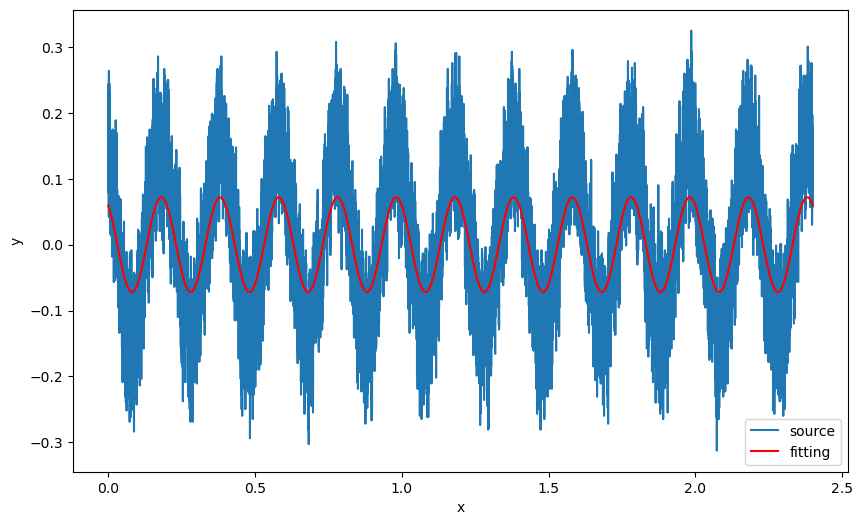

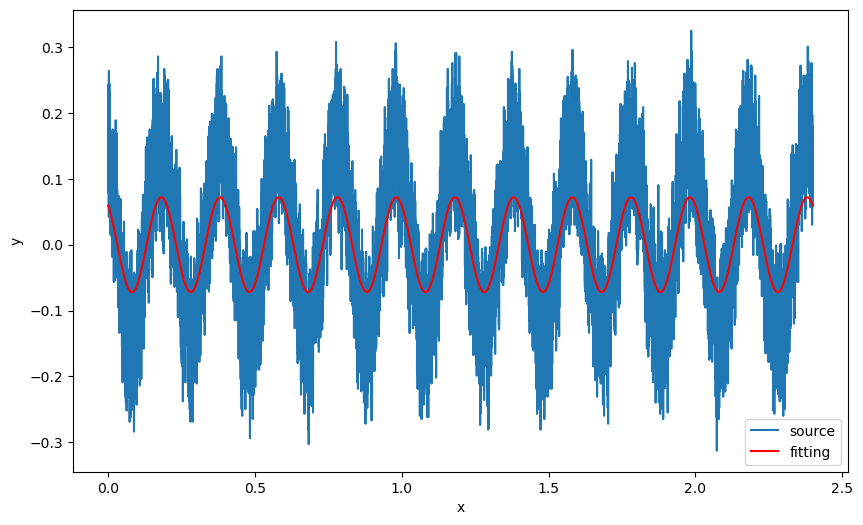

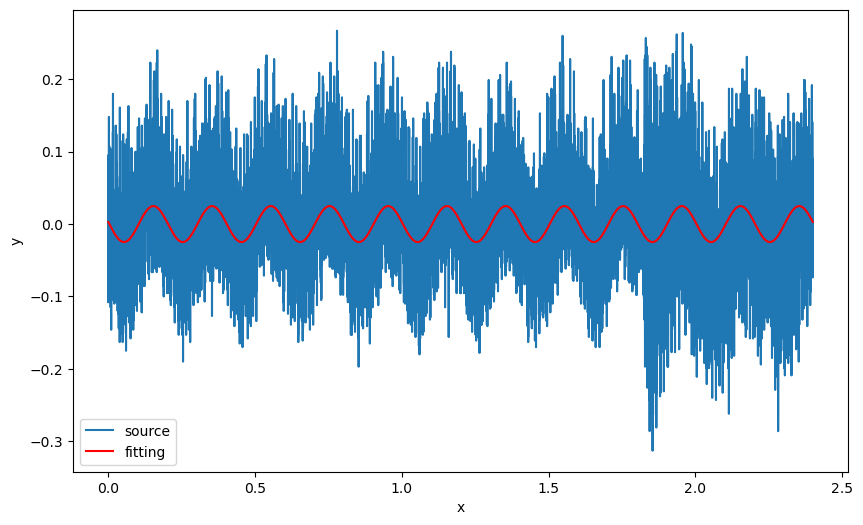

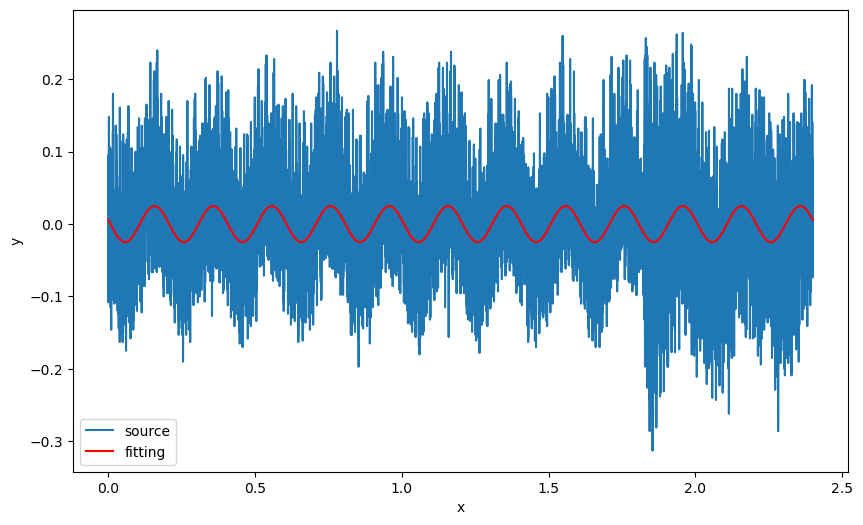

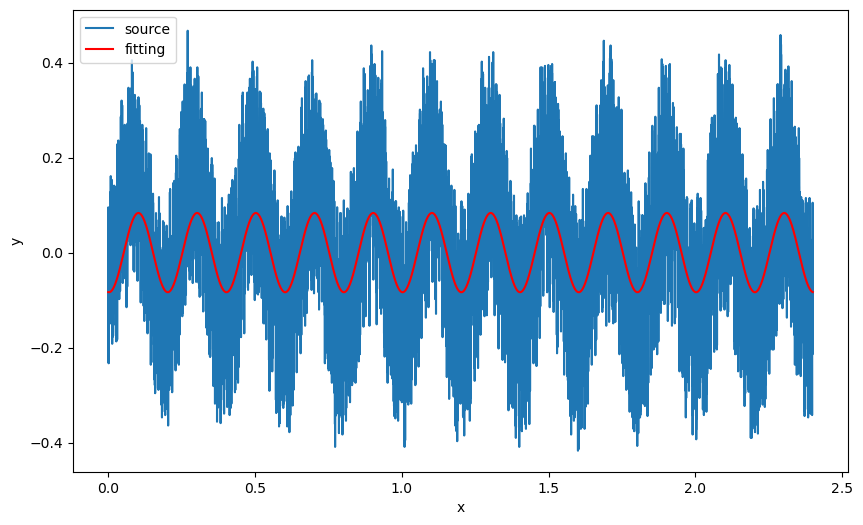

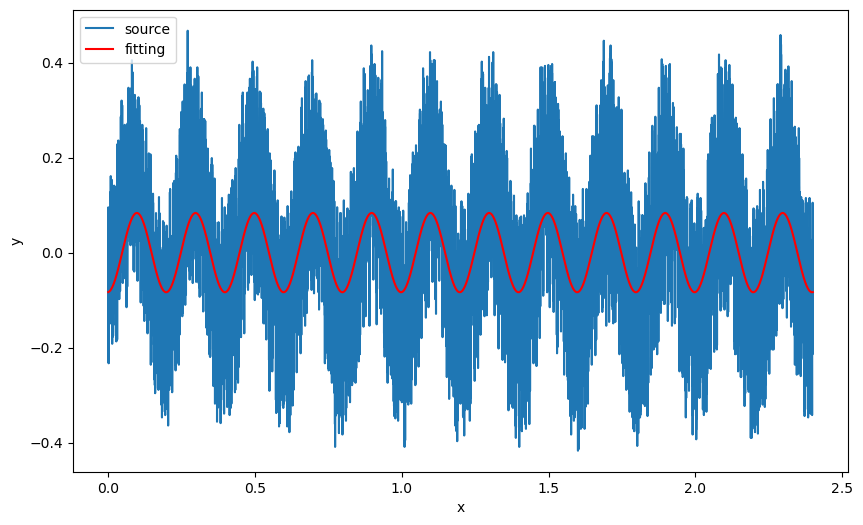

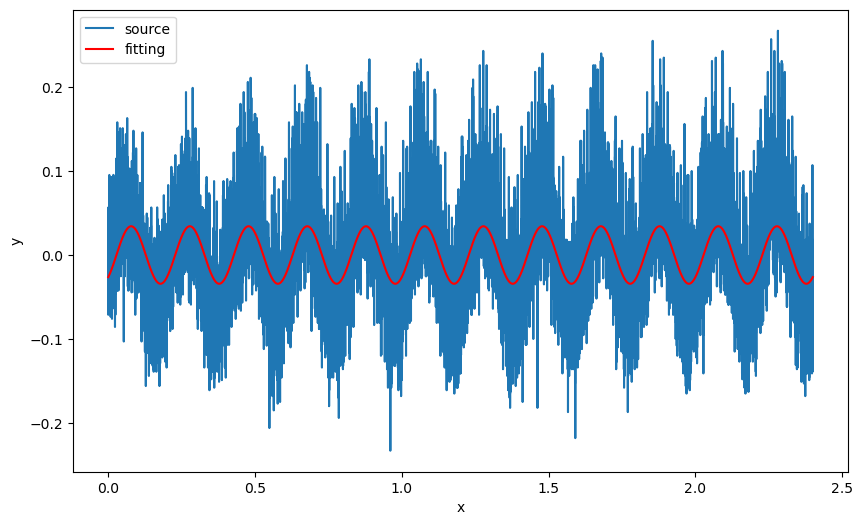

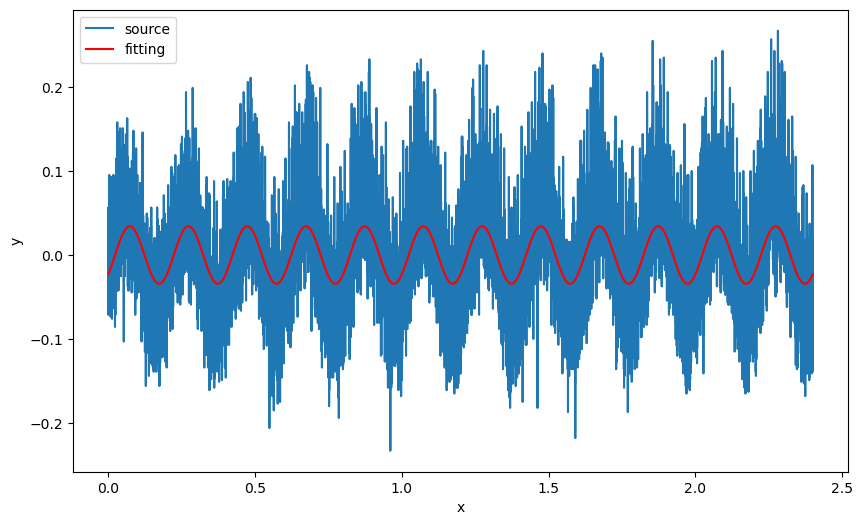

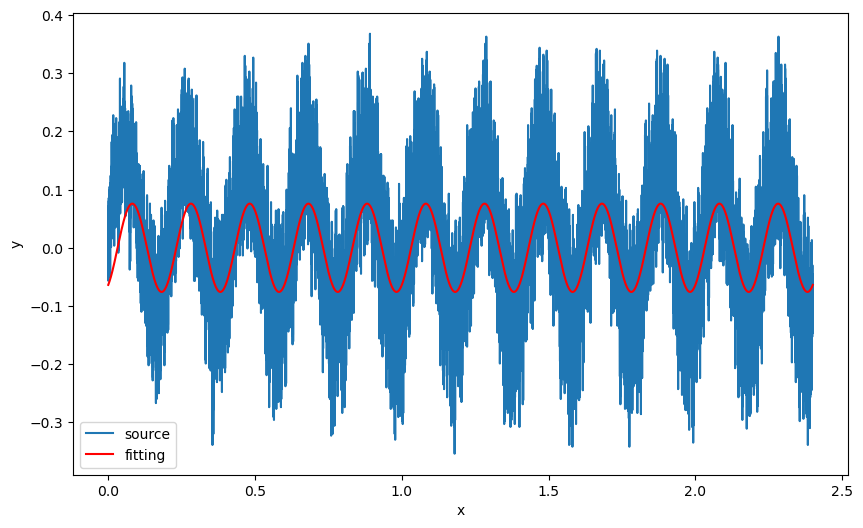

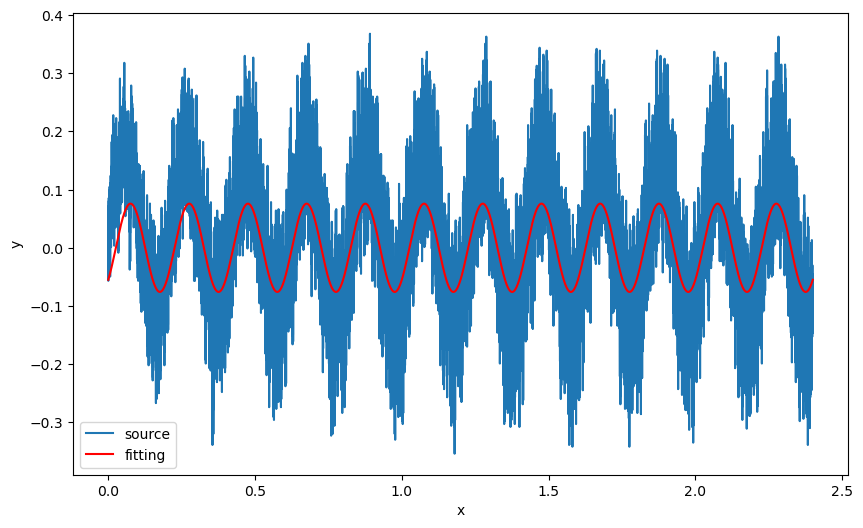

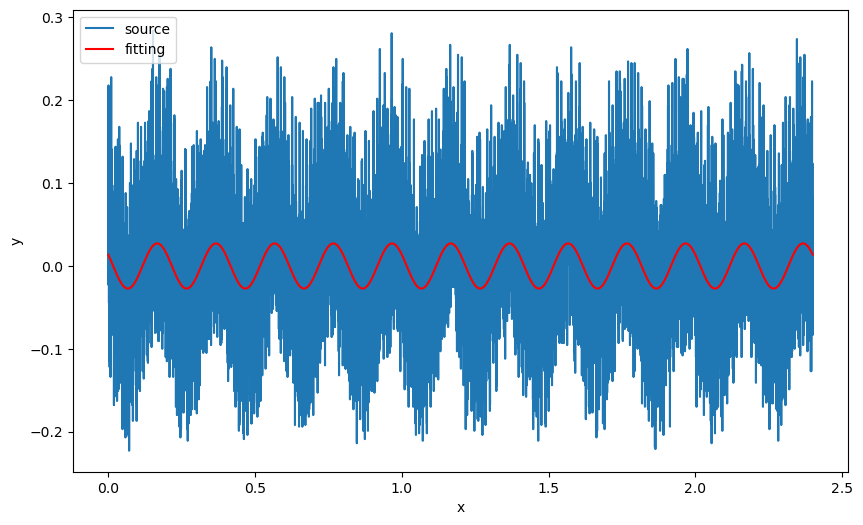

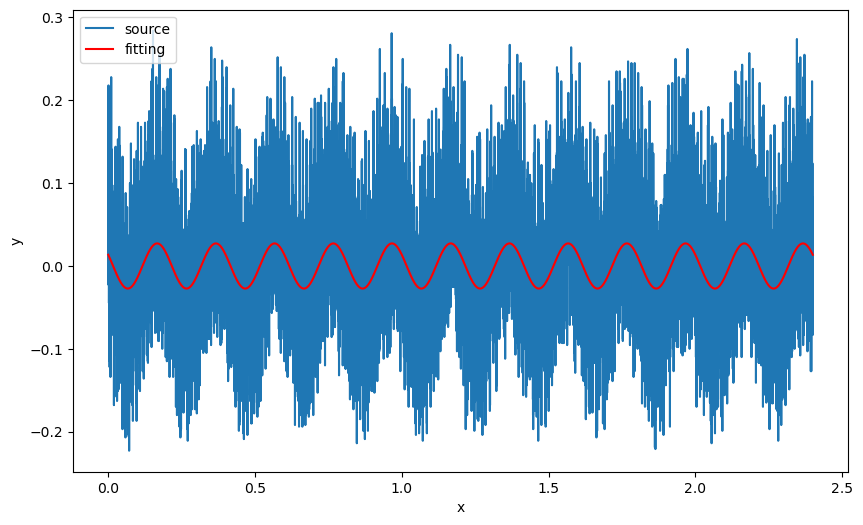

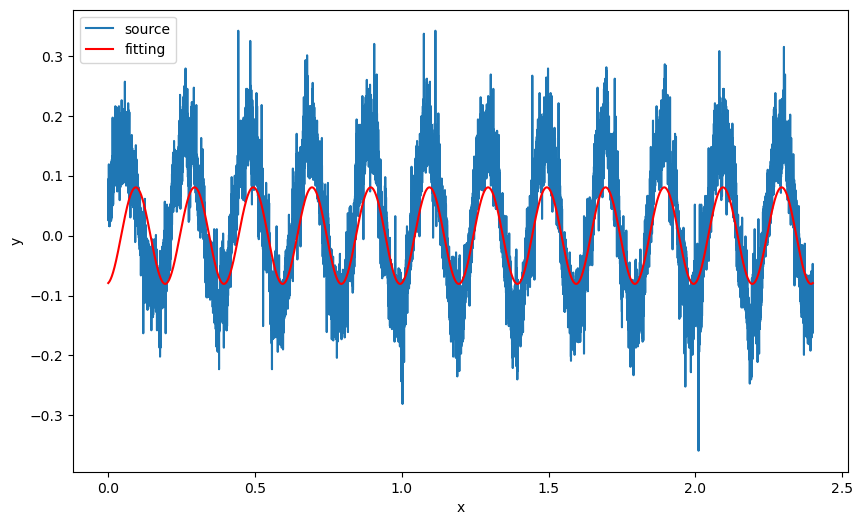

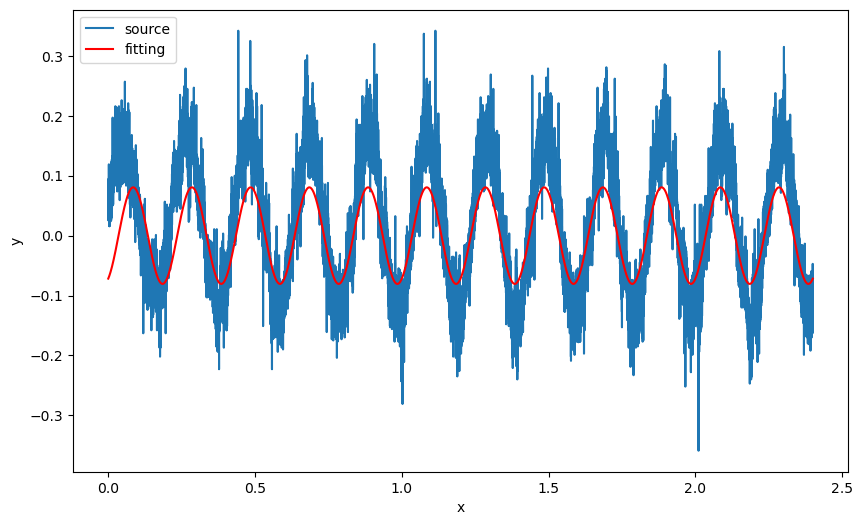

ValueError: x and y must have same first dimension, but have shapes (6500001,) and (6000000,)

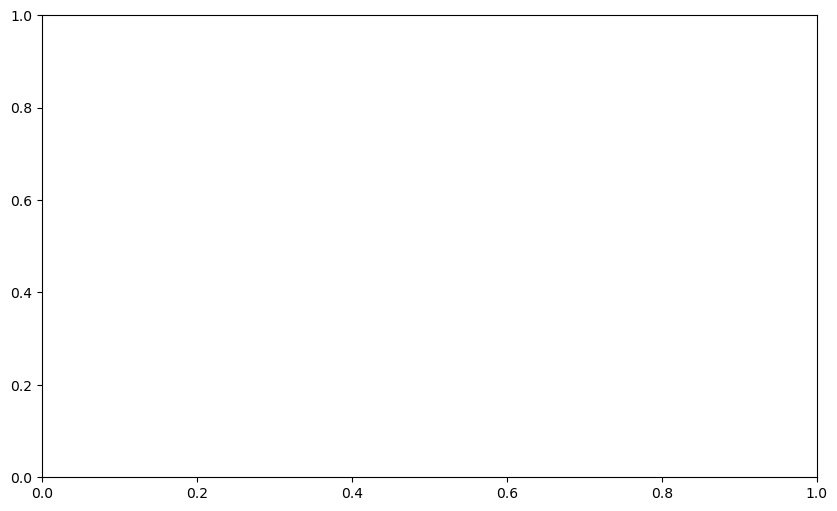

In [15]:
for i in range(len(data_list)):
     plot_curve(data_list[i][0], data_list[i][1], params_b[i], ifft_fit_popts[i])
     plot_curve(data_list[i][0], data_list[i][1], params_b[i], [ifft_fit_popts[i][0], phases[i]])

In [17]:
# 保存拟合结果
with open('fit_result_final.txt', 'w+', encoding="utf-8") as f:
    for i in range(len(filtered_signals)):
        f.write(f" {file_names[i][len(root_dir):]} : \n")
        f.write(f" fft + ifft fit : \n f = {ifft_fit_popts[i][0]} *cos( {params_b[i]} *x + {phases[i]} )\n\n\n")
        # f.write(f" fft + opt fit : \n f = {popts[i][0]} *sin( {params_b[i]} *x + {popts[i][1]} )\n\n")